# PROBLEM STATEMENT
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The data is provided in the csv file below.

 

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house

How well those variables describe the price of a house

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [144]:
# reading the dataset
Housing = pd.read_csv("train.csv")

In [145]:
# summary of the dataset: 1460 rows, 81 columns
print(Housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [146]:
# all numeric (float and int) variables in the dataset
#Trying to check the correlation between numeric values
Housing_numeric = Housing.select_dtypes(include=['float64', 'int64'])
Housing_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1    ...      WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706    ...               0           61   
1          1976         0.0         978    ...             298            0   
2          2002       162.0         486    ...               0           42   
3          1970         0.0         216    ...               0           35   
4          2000       350.0         655    ...             192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [147]:

Housing_numeric['YrSold'].astype('category').value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [148]:
round(100*(Housing_numeric.isnull().sum()/len(Housing_numeric.index)), 2)

Id                0.00
MSSubClass        0.00
LotFrontage      17.74
LotArea           0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
MasVnrArea        0.55
BsmtFinSF1        0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea         0.00
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
TotRmsAbvGrd      0.00
Fireplaces        0.00
GarageYrBlt       5.55
GarageCars        0.00
GarageArea        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SalePrice         0.00
dtype: float64

In [149]:
#As LotFrontage has high number of null values dropping them
Housing_numeric = Housing_numeric[~np.isnan(Housing_numeric['LotFrontage'])]

round(100*(Housing_numeric.isnull().sum()/len(Housing_numeric.index)), 2)

Id               0.00
MSSubClass       0.00
LotFrontage      0.00
LotArea          0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
MasVnrArea       0.50
BsmtFinSF1       0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBath     0.00
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
TotRmsAbvGrd     0.00
Fireplaces       0.00
GarageYrBlt      6.16
GarageCars       0.00
GarageArea       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SalePrice        0.00
dtype: float64

In [150]:
#Removing NaN values rows from GarageYrBlt and MasVnrArea
Housing_numeric = Housing_numeric[~np.isnan(Housing_numeric['GarageYrBlt'])]
Housing_numeric = Housing_numeric[~np.isnan(Housing_numeric['MasVnrArea'])]

round(100*(Housing_numeric.isnull().sum()/len(Housing_numeric.index)), 2)

Id               0.0
MSSubClass       0.0
LotFrontage      0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
MasVnrArea       0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SalePrice        0.0
dtype: float64

<Figure size 1440x720 with 0 Axes>

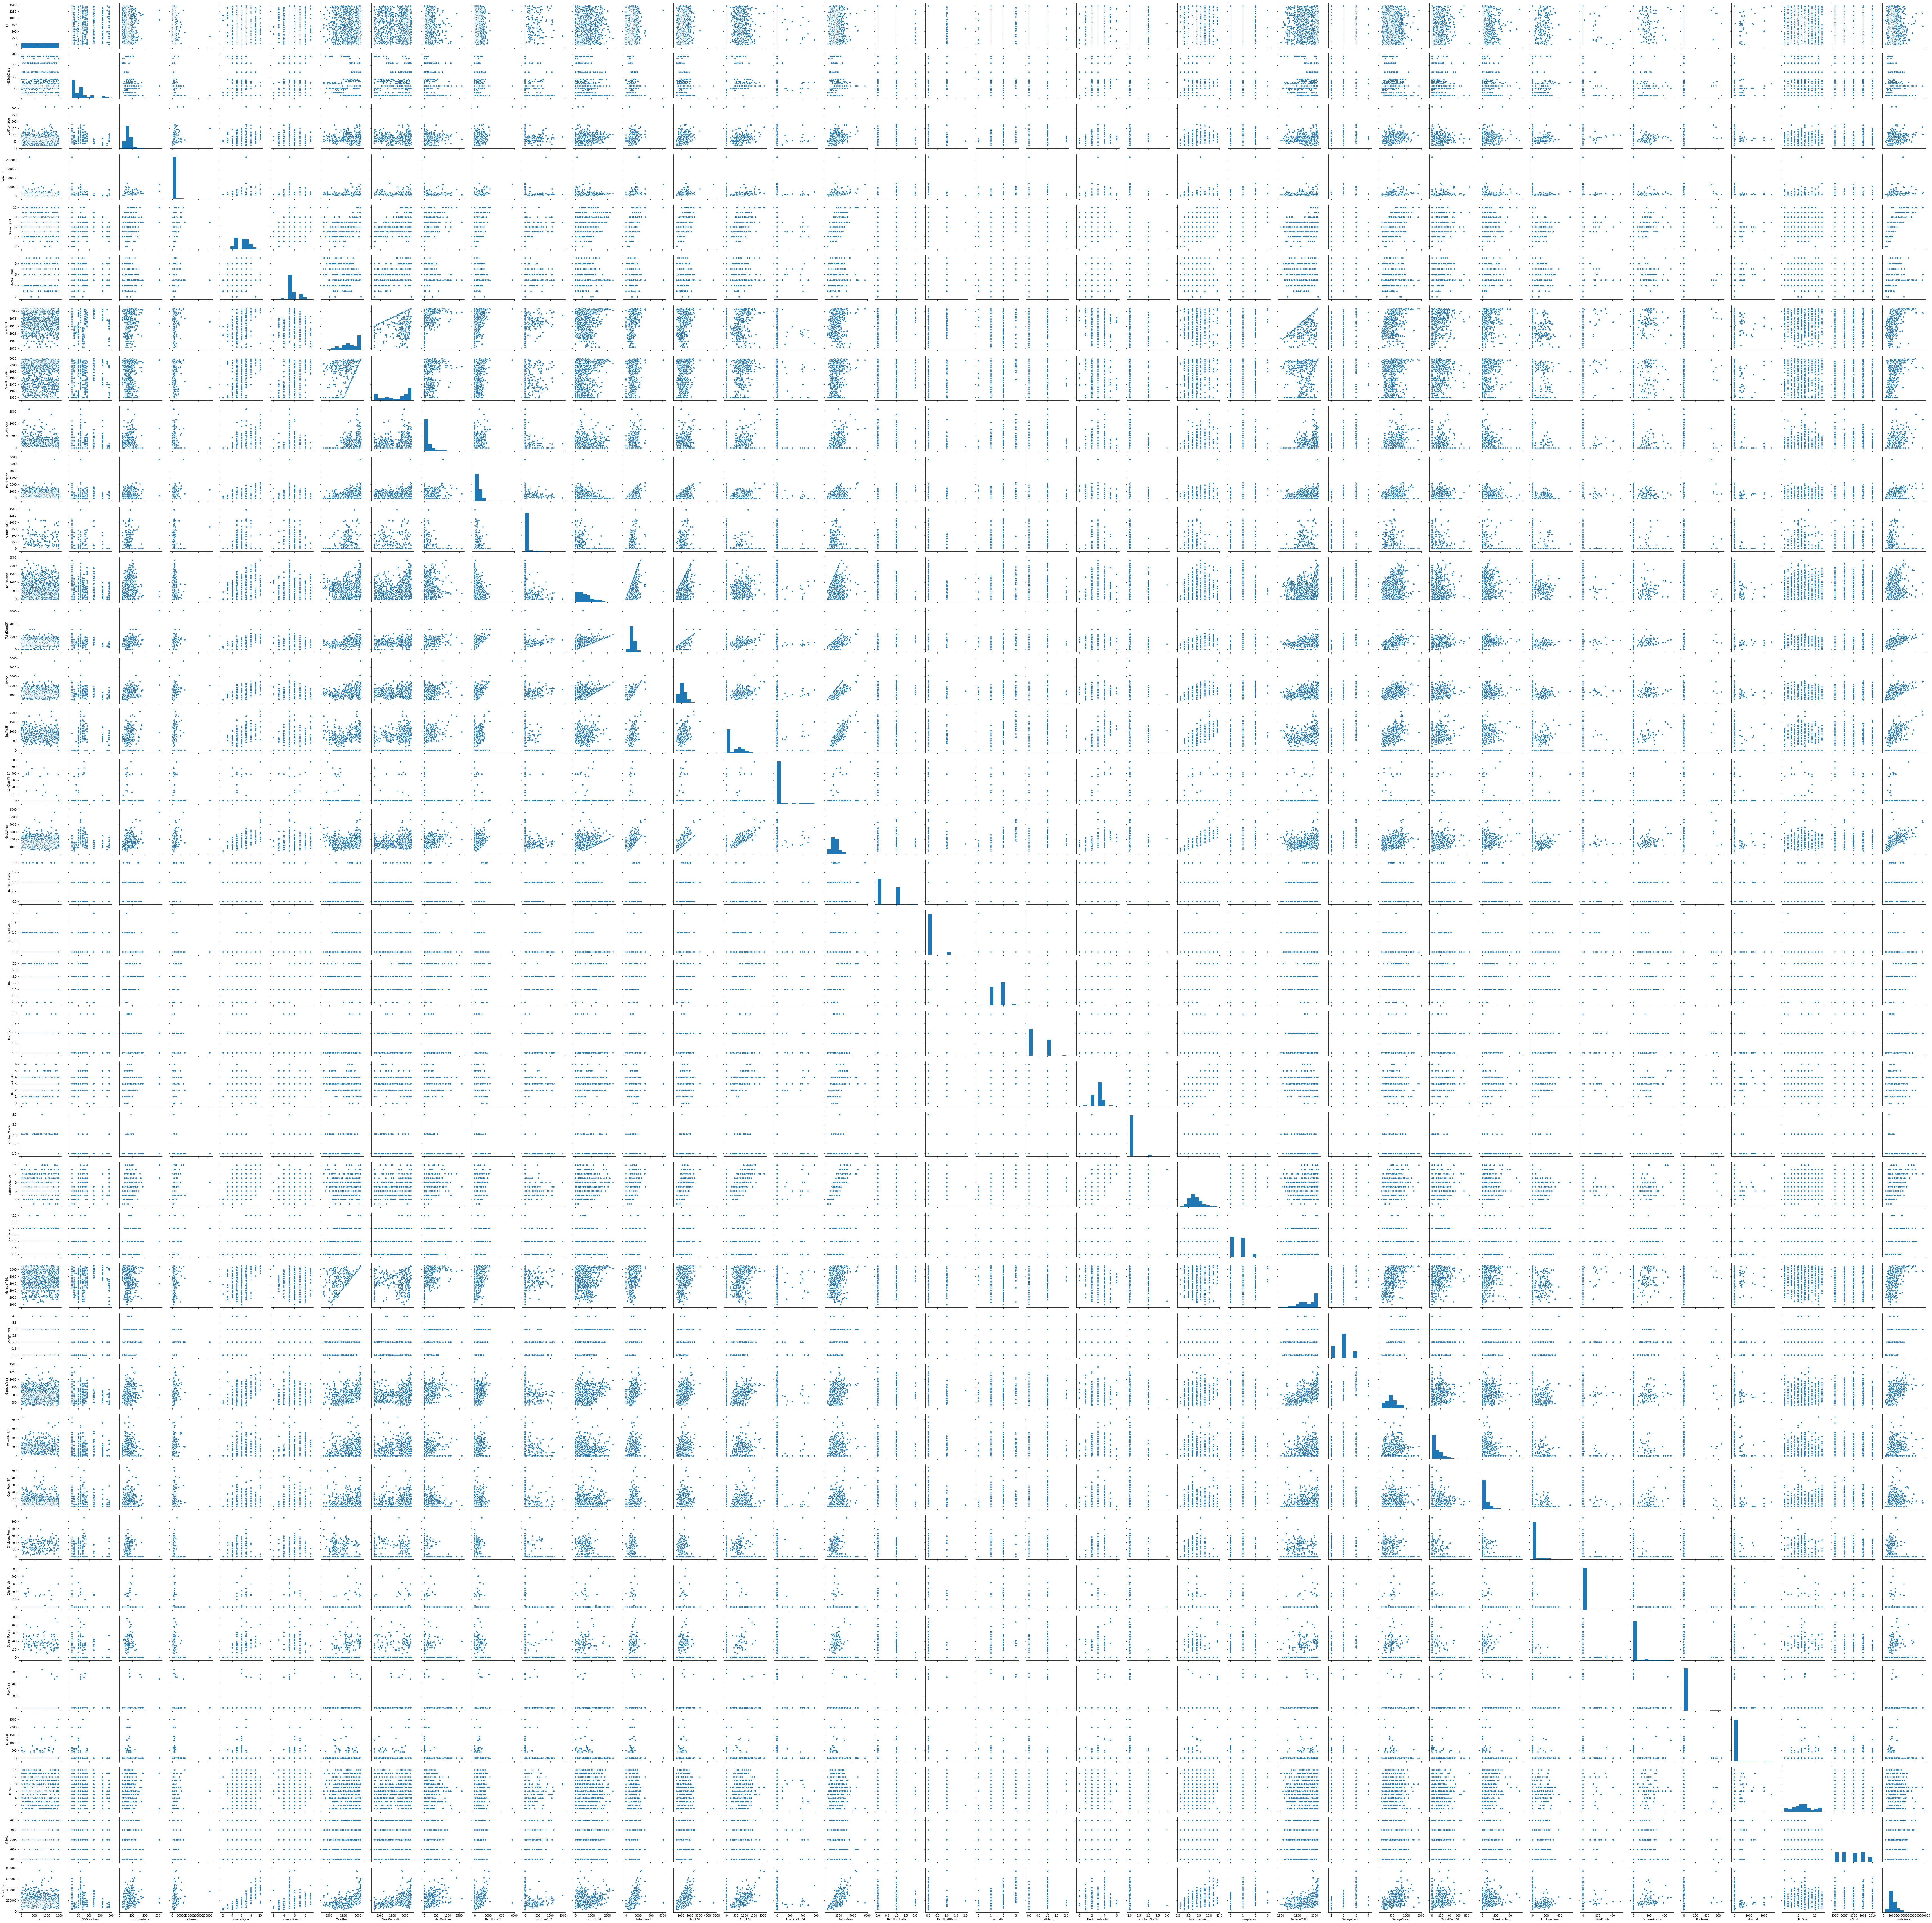

In [9]:
# paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(Housing_numeric)
plt.show()

# Seems like we cannot make out the correlation between these as there are too many values



# Working on the original data set
# Data Cleaning and Analysis

In [151]:
round(100*(Housing.isnull().sum()/len(Housing.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [152]:
#Dropping Columns with more than 15% NA values
Housing = Housing.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley','LotFrontage','GarageCond','GarageQual','GarageFinish','GarageYrBlt','GarageType','MasVnrType','MasVnrArea'], axis=1)

In [153]:
round(100*(Housing.isnull().sum()/len(Housing.index)), 2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
                 ... 
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBath     0.00
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
KitchenQual      0.00
TotRmsAbvGrd     0.00
Functional       0.00
Fireplaces

In [154]:
Housing = Housing.drop(['BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual'], axis=1)
print(Housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-

In [155]:
Housing = Housing.drop(['Electrical','BsmtFinType2'], axis=1)
print(Housing.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-

# Splitting the data into X and y, and scaling the X df

In [156]:

# split into X and y
X = Housing
X = X.drop(['SalePrice'], axis=1)

y = Housing['SalePrice']


In [157]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2      ...      ExterCond Foundation  \
0      CollgCr       Norm       Norm      ...             TA      PConc   
1      Veenker      Feedr       Norm      ...             TA     CBlock   
2      CollgCr       Norm       Norm      ...             TA      PConc   
3      Crawfor       Norm       Norm      ...             TA     BrkTil   
4      NoRidge       Norm       Norm      ...             TA      PConc   

  Heating HeatingQC CentralAir KitchenQual Functional PavedDrive SaleType  \
0    GasA        Ex          Y          Gd        Typ          Y       WD   
1    GasA        Ex          Y          TA        Typ          Y       WD   
2    GasA        Ex          Y          Gd        Typ          Y       WD   
3    GasA        Gd          Y          Gd        Typ          Y       WD   
4    GasA        Ex          Y          Gd        Typ          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 27 columns]

In [158]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

           ...            SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0          ...                         0               0             0   
1          ...                         0               0             0   
2          ...                         0               0             0   
3          ...                         0               0             0   
4          ...                         0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 155 columns]

In [159]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [160]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [161]:
X.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF          ...            SaleType_ConLI  \
0         706           0        150          ...                         0   
1         978           0        284          ...                         0   
2         486           0        434          ...                         0   
3         216           0        540          ...                         0   
4         655           0        490          ...                         0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 189 columns]

In [162]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=189)

In [163]:
X.head()

Id  MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
0 -1.730865    0.073375 -0.207142     0.651479    -0.517200   1.050994   
1 -1.728492   -0.872563 -0.091886    -0.071836     2.179628   0.156734   
2 -1.726120    0.073375  0.073480     0.651479    -0.517200   0.984752   
3 -1.723747    0.309859 -0.096897     0.651479    -0.517200  -1.863632   
4 -1.721374    0.073375  0.375148     1.374795    -0.517200   0.951632   

   YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF          ...            \
0      0.878668    0.575425   -0.288653  -0.944591          ...             
1     -0.429577    1.171992   -0.288653  -0.641228          ...             
2      0.830215    0.092907   -0.288653  -0.301643          ...             
3     -0.720298   -0.499274   -0.288653  -0.061670          ...             
4      0.733308    0.463568   -0.288653  -0.174865          ...             

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0       -0.058621       -0.058621     -0.301962     -0.045376     0.390293   
1       -0.058621       -0.058621     -0.301962     -0.045376     0.390293   
2       -0.058621       -0.058621     -0.301962     -0.045376     0.390293   
3       -0.058621       -0.058621     -0.301962     -0.045376     0.390293   
4       -0.058621       -0.058621     -0.301962     -0.045376     0.390293   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0              -0.052414             -0.091035             -0.117851   
1              -0.052414             -0.091035             -0.117851   
2              -0.052414             -0.091035             -0.117851   
3              -0.052414             -0.091035             -0.117851   
4              -0.052414             -0.091035             -0.117851   

   SaleCondition_Normal  SaleCondition_Partial  
0              0.467651              -0.305995  
1              0.467651              -0.305995  
2              0.467651              -0.305995  
3             -2.138345              -0.305995  
4              0.467651              -0.305995  

[5 rows x 189 columns]

In [164]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Lasso Regression

In [165]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()


# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   30.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [166]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.219449      0.025474         0.006249        0.007653      0.0001   
1       0.245197      0.007649         0.000791        0.001581       0.001   
2       0.260462      0.021868         0.000792        0.001584        0.01   
3       0.245547      0.013229         0.000789        0.001577        0.05   
4       0.262384      0.006724         0.000000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -16687.724532      -21274.089810      -21972.594828   
1   {'alpha': 0.001}      -16687.705239      -21274.060479      -21972.655484   
2    {'alpha': 0.01}      -16687.512309      -21273.767351      -21972.904599   
3    {'alpha': 0.05}      -16686.654914      -21272.467810      -21972.017535   
4     {'alpha': 0.1}      -16685.574396      -21270.852677      -21970.653342   

   split3_test_score       ...         mean_test_score  std_test_score  \
0      -22136.317255       ...           -20246.826017     2071.149448   
1      -22136.206285       ...           -20246.813220     2071.139471   
2      -22135.097630       ...           -20246.615838     2070.979566   
3      -22130.163028       ...           -20245.358443     2069.926973   
4      -22123.962949       ...           -20243.762860     2068.551992   

   rank_test_score  split0_train_score  split1_train_score  \
0               28       -13658.735014       -12771.764093   
1               27       -13658.733034       -12771.761358   
2               26       -13658.726198       -12771.744622   
3               25       -13658.704931       -12771.691475   
4               24       -13658.682046       -12771.630046   

   split2_train_score  split3_train_score  split4_train_score  \
0       -13384.742161       -13370.351497       -12853.858394   
1       -13384.737491       -13370.349865       -12853.858884   
2       -13384.692102       -13370.336270       -12853.877360   
3       -13384.489749       -13370.291013       -12853.978002   
4       -13384.240166       -13370.231562       -12854.097100   

   mean_train_score  std_train_score  
0     -13207.890232       339.551421  
1     -13207.888126       339.550852  
2     -13207.875310       339.543455  
3     -13207.831034       339.505081  
4     -13207.776184       339.458313  

[5 rows x 21 columns]

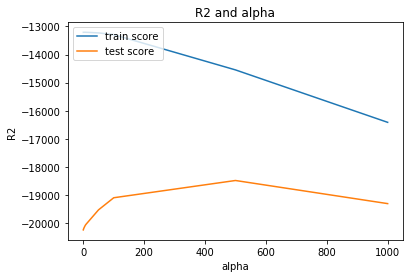

In [167]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [93]:
model_cv.best_params_

{'alpha': 500}

# optimal alpha value for Lasso is 500

In [170]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

# predict
y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9121476023297831
0.8490774099429329


# R2 score for Lasso Training is 91.26 and for  test set is 84.87

In [171]:
lasso.coef_

array([    -0.        ,  -3803.25262742,   4379.67900864,  14980.15348269,
         4060.91853344,   7200.7436889 ,   3527.63479686,   6435.75316202,
          354.60857509,     -0.        ,   3011.48619862,      0.        ,
            0.        ,  -1959.7947534 ,  32213.32159125,   3713.97428692,
          246.88417446,   2112.95199999,     -0.        ,  -2497.9634615 ,
        -3035.79444718,      0.        ,   1566.82064168,   6083.88293932,
            0.        ,   1622.54935831,    509.89541298,     -0.        ,
          189.20418407,    732.68952365,     -0.        ,     -0.        ,
         -585.01312136,    -89.51879281,      0.        ,      0.        ,
          603.01688492,     -0.        ,   1474.20713471,      0.        ,
        -1563.19936848,     -0.        ,   1555.09342835,    278.61068834,
          653.59512702,   -351.82612858,   2416.55642197,   -346.56526464,
          -69.28081201,      0.        ,    716.27636388,      0.        ,
            0.        ,  

In [172]:

model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 180687.965),
 ('Id', -0.0),
 ('MSSubClass', -3803.253),
 ('LotArea', 4379.679),
 ('OverallQual', 14980.153),
 ('OverallCond', 4060.919),
 ('YearBuilt', 7200.744),
 ('YearRemodAdd', 3527.635),
 ('BsmtFinSF1', 6435.753),
 ('BsmtFinSF2', 354.609),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 3011.486),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -1959.795),
 ('GrLivArea', 32213.322),
 ('BsmtFullBath', 3713.974),
 ('BsmtHalfBath', 246.884),
 ('FullBath', 2112.952),
 ('HalfBath', -0.0),
 ('BedroomAbvGr', -2497.963),
 ('KitchenAbvGr', -3035.794),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 1566.821),
 ('GarageCars', 6083.883),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 1622.549),
 ('OpenPorchSF', 509.895),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 189.204),
 ('ScreenPorch', 732.69),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('MoSold', -585.013),
 ('YrSold', -89.519),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 603.017),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 

# 'RoofMatl_CompShg'
# 'GrLivArea'
# are the top two features to look for as per Lasso regression

# Ridge Regression

In [173]:
ridge = Ridge()

# cross validation

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [174]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.005598      0.004798         0.001599        0.001959      0.0001   
1       0.006249      0.007654         0.000000        0.000000       0.001   
2       0.007912      0.006592         0.000799        0.001598        0.01   
3       0.003236      0.001620         0.000000        0.000000        0.05   
4       0.006249      0.007653         0.000000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -16689.654400      -21257.212202      -21991.739944   
1   {'alpha': 0.001}      -16689.434619      -21257.152317      -21991.459062   
2    {'alpha': 0.01}      -16687.241716      -21256.556748      -21988.658828   
3    {'alpha': 0.05}      -16677.600255      -21253.979227      -21976.397954   
4     {'alpha': 0.1}      -16666.295033      -21251.077446      -21961.660849   

   split3_test_score       ...         mean_test_score  std_test_score  \
0      -22211.266303       ...           -20252.850281     2091.013858   
1      -22210.353758       ...           -20252.500296     2090.895608   
2      -22201.275537       ...           -20249.013611     2089.723668   
3      -22161.917877       ...           -20234.010312     2084.621048   
4      -22114.787853       ...           -20216.460828     2078.338910   

   rank_test_score  split0_train_score  split1_train_score  \
0               27       -13658.929501       -12772.144797   
1               26       -13658.919869       -12772.134173   
2               25       -13658.823554       -12772.028321   
3               24       -13658.512039       -12771.565857   
4               23       -13658.144842       -12771.004514   

   split2_train_score  split3_train_score  split4_train_score  \
0       -13386.136429       -13369.642562       -12854.010614   
1       -13386.060843       -13369.601260       -12854.021614   
2       -13385.307466       -13369.187574       -12854.131520   
3       -13382.012235       -13367.460004       -12854.648088   
4       -13378.844286       -13365.457493       -12855.550993   

   mean_train_score  std_train_score  
0     -13208.172781       339.551591  
1     -13208.147552       339.537617  
2     -13207.895687       339.398114  
3     -13206.839645       338.819849  
4     -13205.800426       338.163327  

[5 rows x 21 columns]

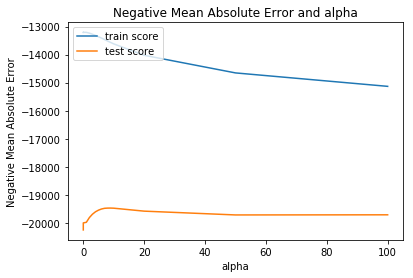

In [175]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [176]:
model_cv.best_params_

{'alpha': 9.0}

# Optimal Alpha from Ridge is 9

In [177]:
alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.9299672852372849
0.8430892541674673


# R2 score for Ridge Training is 92.96 and for  test set is 84.30

In [178]:
ridge.coef_

array([ 6.27403647e+01, -2.92391195e+03,  6.08011817e+03,  1.19236430e+04,
        4.78894196e+03,  9.99021464e+03,  2.83036882e+03,  6.70230250e+03,
        6.54256382e+02, -1.23053312e+03,  5.96919953e+03,  8.91000024e+03,
        1.74427221e+04, -1.00659548e+03,  2.09518711e+04,  2.70312808e+03,
        6.35719196e+02,  1.59541094e+03, -1.19529152e+03, -3.60941476e+03,
       -3.83569519e+03, -1.37948168e+02,  1.44966632e+03,  6.59182006e+03,
       -9.78445121e+02,  1.57616841e+03,  1.15183084e+03,  2.70742606e+02,
        7.79377691e+02,  1.26715605e+03,  1.02027327e+03,  2.75146266e+02,
       -1.18143725e+03, -7.76932182e+02,  3.10794753e+03,  1.86500553e+03,
        6.91072485e+03,  5.14272667e+03,  2.84631540e+03, -1.97964423e+02,
       -1.35864099e+03,  8.68218626e+01,  2.58772303e+03,  6.95811615e+02,
        2.99139309e+03, -6.77670078e+02,  2.34720817e+03, -9.82665018e+02,
       -2.01723332e+02, -1.37078910e+02,  1.73481406e+03, -8.73132926e+02,
        3.54773836e+02,  

In [179]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 180663.151),
 ('Id', 62.74),
 ('MSSubClass', -2923.912),
 ('LotArea', 6080.118),
 ('OverallQual', 11923.643),
 ('OverallCond', 4788.942),
 ('YearBuilt', 9990.215),
 ('YearRemodAdd', 2830.369),
 ('BsmtFinSF1', 6702.303),
 ('BsmtFinSF2', 654.256),
 ('BsmtUnfSF', -1230.533),
 ('TotalBsmtSF', 5969.2),
 ('1stFlrSF', 8910.0),
 ('2ndFlrSF', 17442.722),
 ('LowQualFinSF', -1006.595),
 ('GrLivArea', 20951.871),
 ('BsmtFullBath', 2703.128),
 ('BsmtHalfBath', 635.719),
 ('FullBath', 1595.411),
 ('HalfBath', -1195.292),
 ('BedroomAbvGr', -3609.415),
 ('KitchenAbvGr', -3835.695),
 ('TotRmsAbvGrd', -137.948),
 ('Fireplaces', 1449.666),
 ('GarageCars', 6591.82),
 ('GarageArea', -978.445),
 ('WoodDeckSF', 1576.168),
 ('OpenPorchSF', 1151.831),
 ('EnclosedPorch', 270.743),
 ('3SsnPorch', 779.378),
 ('ScreenPorch', 1267.156),
 ('PoolArea', 1020.273),
 ('MiscVal', 275.146),
 ('MoSold', -1181.437),
 ('YrSold', -776.932),
 ('MSZoning_FV', 3107.948),
 ('MSZoning_RH', 1865.006),
 ('MSZoning_RL',

# 'RoofMatl_CompShg'
# 'GrLivArea'
# are the top two features to look for as per Ridge regression